<a href="https://colab.research.google.com/github/Maxidoz/2401ftds_python_week_2/blob/patch-1/QCTO_Workplace_Module_River_Water_Contamination_Analysis_Masixole_final_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QCTO - Workplace Module

### Project Title: **River Water Contamination Analysis**
#### Done By: **Masixole Nondumo**

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/MyDrive'

/content/gdrive/MyDrive


In [ ]:
cd '/content/gdrive/MyDrive/River_water_contamination_analysis_project'

/content/gdrive/MyDrive/River_water_contamination_analysis_project


In [ ]:
!pwd

/content/gdrive/MyDrive/River_water_contamination_analysis_project


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

###**Data Description**

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

#rq = pd.read_csv("River water parameters.csv", header=0)

# Explicitly set the engine to 'openpyxl' for .xlsx files
#data= 'River water parameters.xlsx - Base de Datos.csv'
#zz= pd.read_csv(data)

# Explicitly set the engine to 'openpyxl' for .xlsx files
kk = 'river_water_parameters_geom.csv'
mlambo = pd.read_csv(kk)
mlambo.head()

Unnamed: 0 Date (DD/MM/YYYY) Time (24 hrs XX:XX)     Sampling point  \
0           0        09/05/2023               14:15      Puente Bilbao   
1           1        14/06/2023               14:30      Puente Bilbao   
2           2        14/06/2023               14:30      Puente Bilbao   
3           3        14/06/2023               15:00  Arroyo_Las Torres   
4           4        14/06/2023               15:00  Arroyo_Las Torres   

   Ambient temperature (°C)  Ambient humidity  Sample temperature (°C)   pH  \
0                      17.0              0.47                     19.0  8.3   
1                      11.9              0.47                     13.0  8.1   
2                      11.9              0.47                     13.0  8.2   
3                      11.9              0.47                     13.0  8.3   
4                      11.9              0.47                     13.0  8.5   

   EC\n(µS/cm)  TDS\n(mg/L)  ...  Hardness\n(mg CaCO3/L)  \
0         1630          810  ...                   147.0   
1         1000          490  ...                    94.0   
2         1000          490  ...                    86.0   
3         1350          670  ...                   200.0   
4         1350          660  ...                   196.0   

   Hardness classification  Total Cl-\n(mg Cl-/L)  Latitude_x  Longitude_x  \
0                   BLANDA                  156.0  -34.574433   -58.487694   
1                   BLANDA                   78.0  -34.574433   -58.487694   
2                   BLANDA                   82.0  -34.574433   -58.487694   
3                 SEMIDURA                  117.0  -34.578544   -58.495511   
4                 SEMIDURA                  117.0  -34.578544   -58.495511   

                        geometry  Latitude_y  Longitude_y   Latitude  \
0  POINT (-58.487694 -34.574433)  -34.574433   -58.487694 -34.574433   
1  POINT (-58.487694 -34.574433)  -34.574433   -58.487694 -34.574433   
2  POINT (-58.487694 -34.574433)  -34.574433   -58.487694 -34.574433   
3  POINT (-58.495511 -34.578544)  -34.578544   -58.495511 -34.578544   
4  POINT (-58.495511 -34.578544)  -34.578544   -58.495511 -34.578544   

   Longitude  
0 -58.487694  
1 -58.487694  
2 -58.487694  
3 -58.495511  
4 -58.495511  

[5 rows x 24 columns]

In [ ]:
rq.head()

Date (DD/MM/YYYY) Time (24 hrs XX:XX)     Sampling point  \
0        09/05/2023               14:15      Puente Bilbao   
1        14/06/2023               14:30      Puente Bilbao   
2        14/06/2023               14:30      Puente Bilbao   
3        14/06/2023               15:00  Arroyo_Las Torres   
4        14/06/2023               15:00  Arroyo_Las Torres   

   Ambient temperature (°C)  Ambient humidity  Sample temperature (°C)   pH  \
0                      17.0              0.47                     19.0  8.3   
1                      11.9              0.47                     13.0  8.1   
2                      11.9              0.47                     13.0  8.2   
3                      11.9              0.47                     13.0  8.3   
4                      11.9              0.47                     13.0  8.5   

   EC\n(µS/cm)  TDS\n(mg/L)  TSS\n(mL sed/L)  DO\n(mg/L)  Level (cm)  \
0         1630          810              1.8        4.30         NaN   
1         1000          490             18.0        5.30         NaN   
2         1000          490             18.0        4.67         NaN   
3         1350          670              0.1        7.01         NaN   
4         1350          660              0.1        7.23         NaN   

   Turbidity (NTU)  Hardness\n(mg CaCO3/L) Hardness classification  \
0              NaN                   147.0                  BLANDA   
1             41.2                    94.0                  BLANDA   
2             38.9                    86.0                  BLANDA   
3             30.7                   200.0                SEMIDURA   
4             25.6                   196.0                SEMIDURA   

   Total Cl-\n(mg Cl-/L)  
0                  156.0  
1                   78.0  
2                   82.0  
3                  117.0  
4                  117.0

In [ ]:
zz.head()

Date (DD/MM/YYYY) Time (24 hrs XX:XX)     Sampling point  \
0         9/05/2023               14:15      Puente Bilbao   
1        14/06/2023               14:30      Puente Bilbao   
2        14/06/2023               14:30      Puente Bilbao   
3        14/06/2023               15:00  Arroyo_Las Torres   
4        14/06/2023               15:00  Arroyo_Las Torres   

   Ambient temperature (°C)  Ambient humidity  Sample temperature (°C)   pH  \
0                      17.0              0.47                     19.0  8.3   
1                      11.9              0.47                     13.0  8.1   
2                      11.9              0.47                     13.0  8.2   
3                      11.9              0.47                     13.0  8.3   
4                      11.9              0.47                     13.0  8.5   

   EC\n(µS/cm)  TDS\n(mg/L)  TSS\n(mL sed/L)  DO\n(mg/L)  Level (cm)  \
0         1630          810              1.8        4.30         NaN   
1         1000          490             18.0        5.30         NaN   
2         1000          490             18.0        4.67         NaN   
3         1350          670              0.1        7.01         NaN   
4         1350          660              0.1        7.23         NaN   

   Turbidity (NTU)  Hardness\n(mg CaCO3/L) Hardness classification  \
0              NaN                   147.0                  BLANDA   
1             41.2                    94.0                  BLANDA   
2             38.9                    86.0                  BLANDA   
3             30.7                   200.0                SEMIDURA   
4             25.6                   196.0                SEMIDURA   

   Total Cl-\n(mg Cl-/L)  
0                  156.0  
1                   78.0  
2                   82.0  
3                  117.0  
4                  117.0

In [ ]:
zz.columns

Index(['Date (DD/MM/YYYY)', 'Time (24 hrs XX:XX)', 'Sampling point',
       'Ambient temperature (°C)', 'Ambient humidity',
       'Sample temperature (°C)', 'pH', 'EC\n(µS/cm)', 'TDS\n(mg/L)',
       'TSS\n(mL sed/L)', 'DO\n(mg/L)', 'Level (cm)', 'Turbidity (NTU)',
       'Hardness\n(mg CaCO3/L)', 'Hardness classification',
       'Total Cl-\n(mg Cl-/L)'],
      dtype='object')

In [ ]:
zz.shape

(219, 16)

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [ ]:
df = rq.copy()
gh = zz.copy()

In [ ]:
#Please use code cells to code in and do not forget to comment your code.
#Data cleaning
COLUMNS = ["Date", "Time", "Sampling_point", "Ambient_temperature",
           "Ambient_humididty", "Sample_temperature", "ph", "Conductivity",
           "TDS", "TSS", "DO", "Level", "Turbidity", "Hardness", "Hard_class", "CL"]

df.columns = COLUMNS

# DateTime transform
df.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")
df.Time = pd.to_datetime(df.Time, format="%H:%M")
df["Datetime"] = df.Date + pd.to_timedelta(df.Time.dt.strftime("%H:%M:%S"))
df.index = df.Datetime
df.drop(["Date", "Time"], axis=1, inplace=True)

df["minute"] = df.Datetime.dt.minute
df["hour"] = df.Datetime.dt.hour
df["day"] = df.Datetime.dt.day
df["month"] = df.Datetime.dt.month
#df["year"] = df.Datetime.dt.year
df["day_of_week"] = df.Datetime.dt.dayofweek
#df["is_weekend"] = df.Datetime.dt.weekday // 5

In [ ]:
#Please use code cells to code in and do not forget to comment your code.
#Label encoding & One-hot encoding

df = pd.get_dummies(df, columns=["Sampling_point"], prefix="pt")

labelencoder = LabelEncoder()
df.Hard_class = labelencoder.fit_transform(df.Hard_class)

In [ ]:
df.drop(["Datetime"], axis=1, inplace=True)
df.drop(["Hard_class"], axis=1, inplace=True)
knn = KNNImputer(missing_values=np.nan,n_neighbors=5)
df = pd.DataFrame(knn.fit_transform(df), index=df.index, columns=df.columns )

In [ ]:
gh.columns

Index(['Date (DD/MM/YYYY)', 'Time (24 hrs XX:XX)', 'Sampling point',
       'Ambient temperature (°C)', 'Ambient humidity',
       'Sample temperature (°C)', 'pH', 'EC\n(µS/cm)', 'TDS\n(mg/L)',
       'TSS\n(mL sed/L)', 'DO\n(mg/L)', 'Level (cm)', 'Turbidity (NTU)',
       'Hardness\n(mg CaCO3/L)', 'Hardness classification',
       'Total Cl-\n(mg Cl-/L)'],
      dtype='object')

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [ ]:
df.shape

(219, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  Hardness c

In [ ]:
gh.shape

(219, 16)

In [ ]:
gh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  Hardness c

##**Data Visualization**

<Axes: >

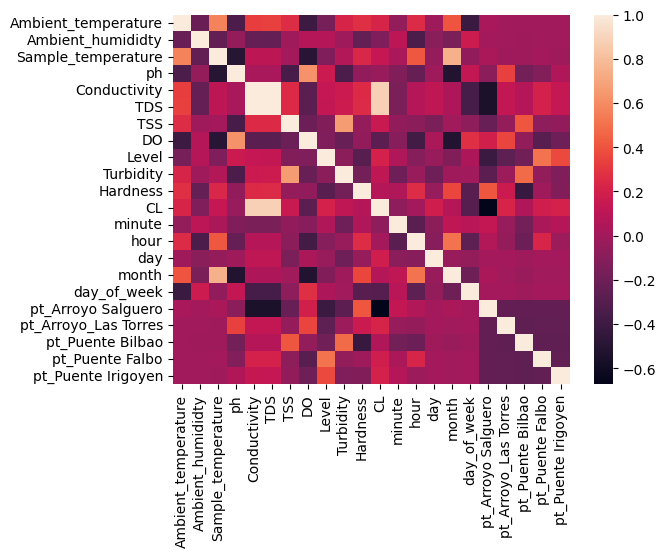

In [ ]:
sns.heatmap(df.corr())

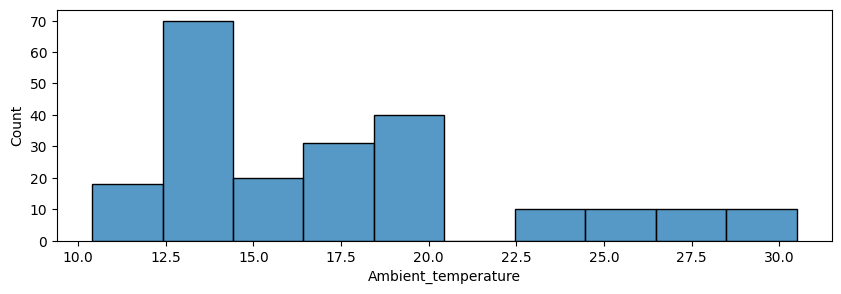

In [ ]:
plt.figure(figsize= (10,3))
# Check for typos and correct the column name if needed
sns.histplot(df['Ambient_temperature'])
plt.show()

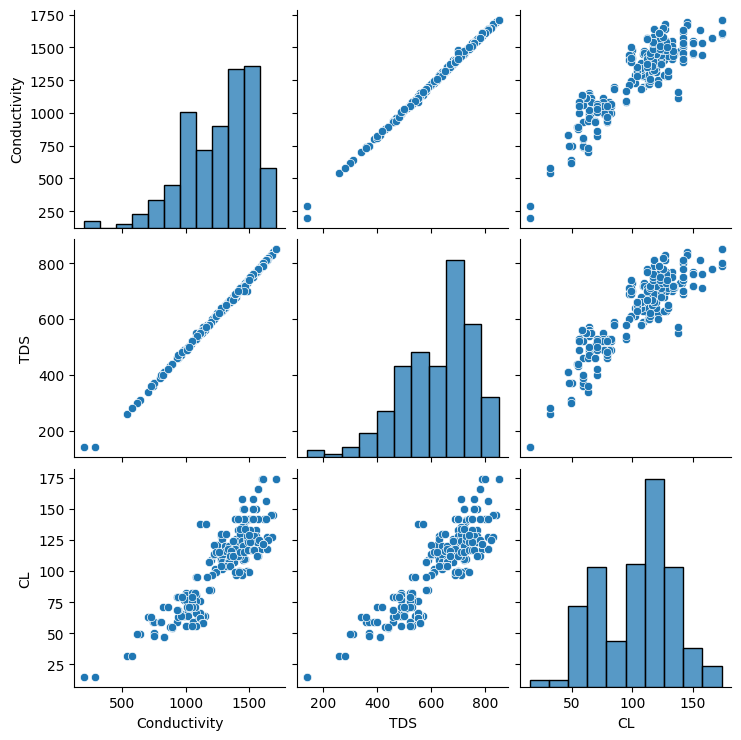

In [ ]:
sns.pairplot(df[["Conductivity", "TDS", "CL"]])

<Axes: ylabel='DO'>

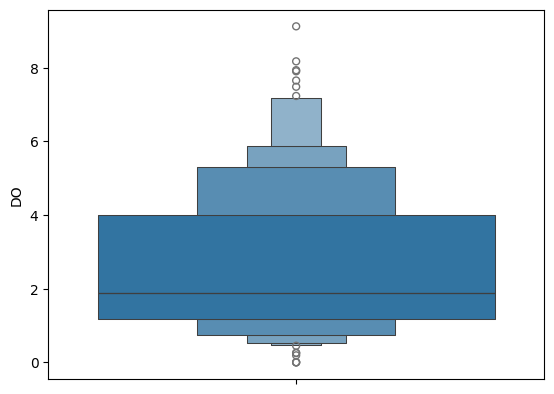

In [ ]:
sns.boxenplot(df.DO)

In [ ]:
from plotly.express import histogram
histogram(data_frame=gh, x='Sampling point').show()
histogram(data_frame=gh, x='Hardness classification').show()

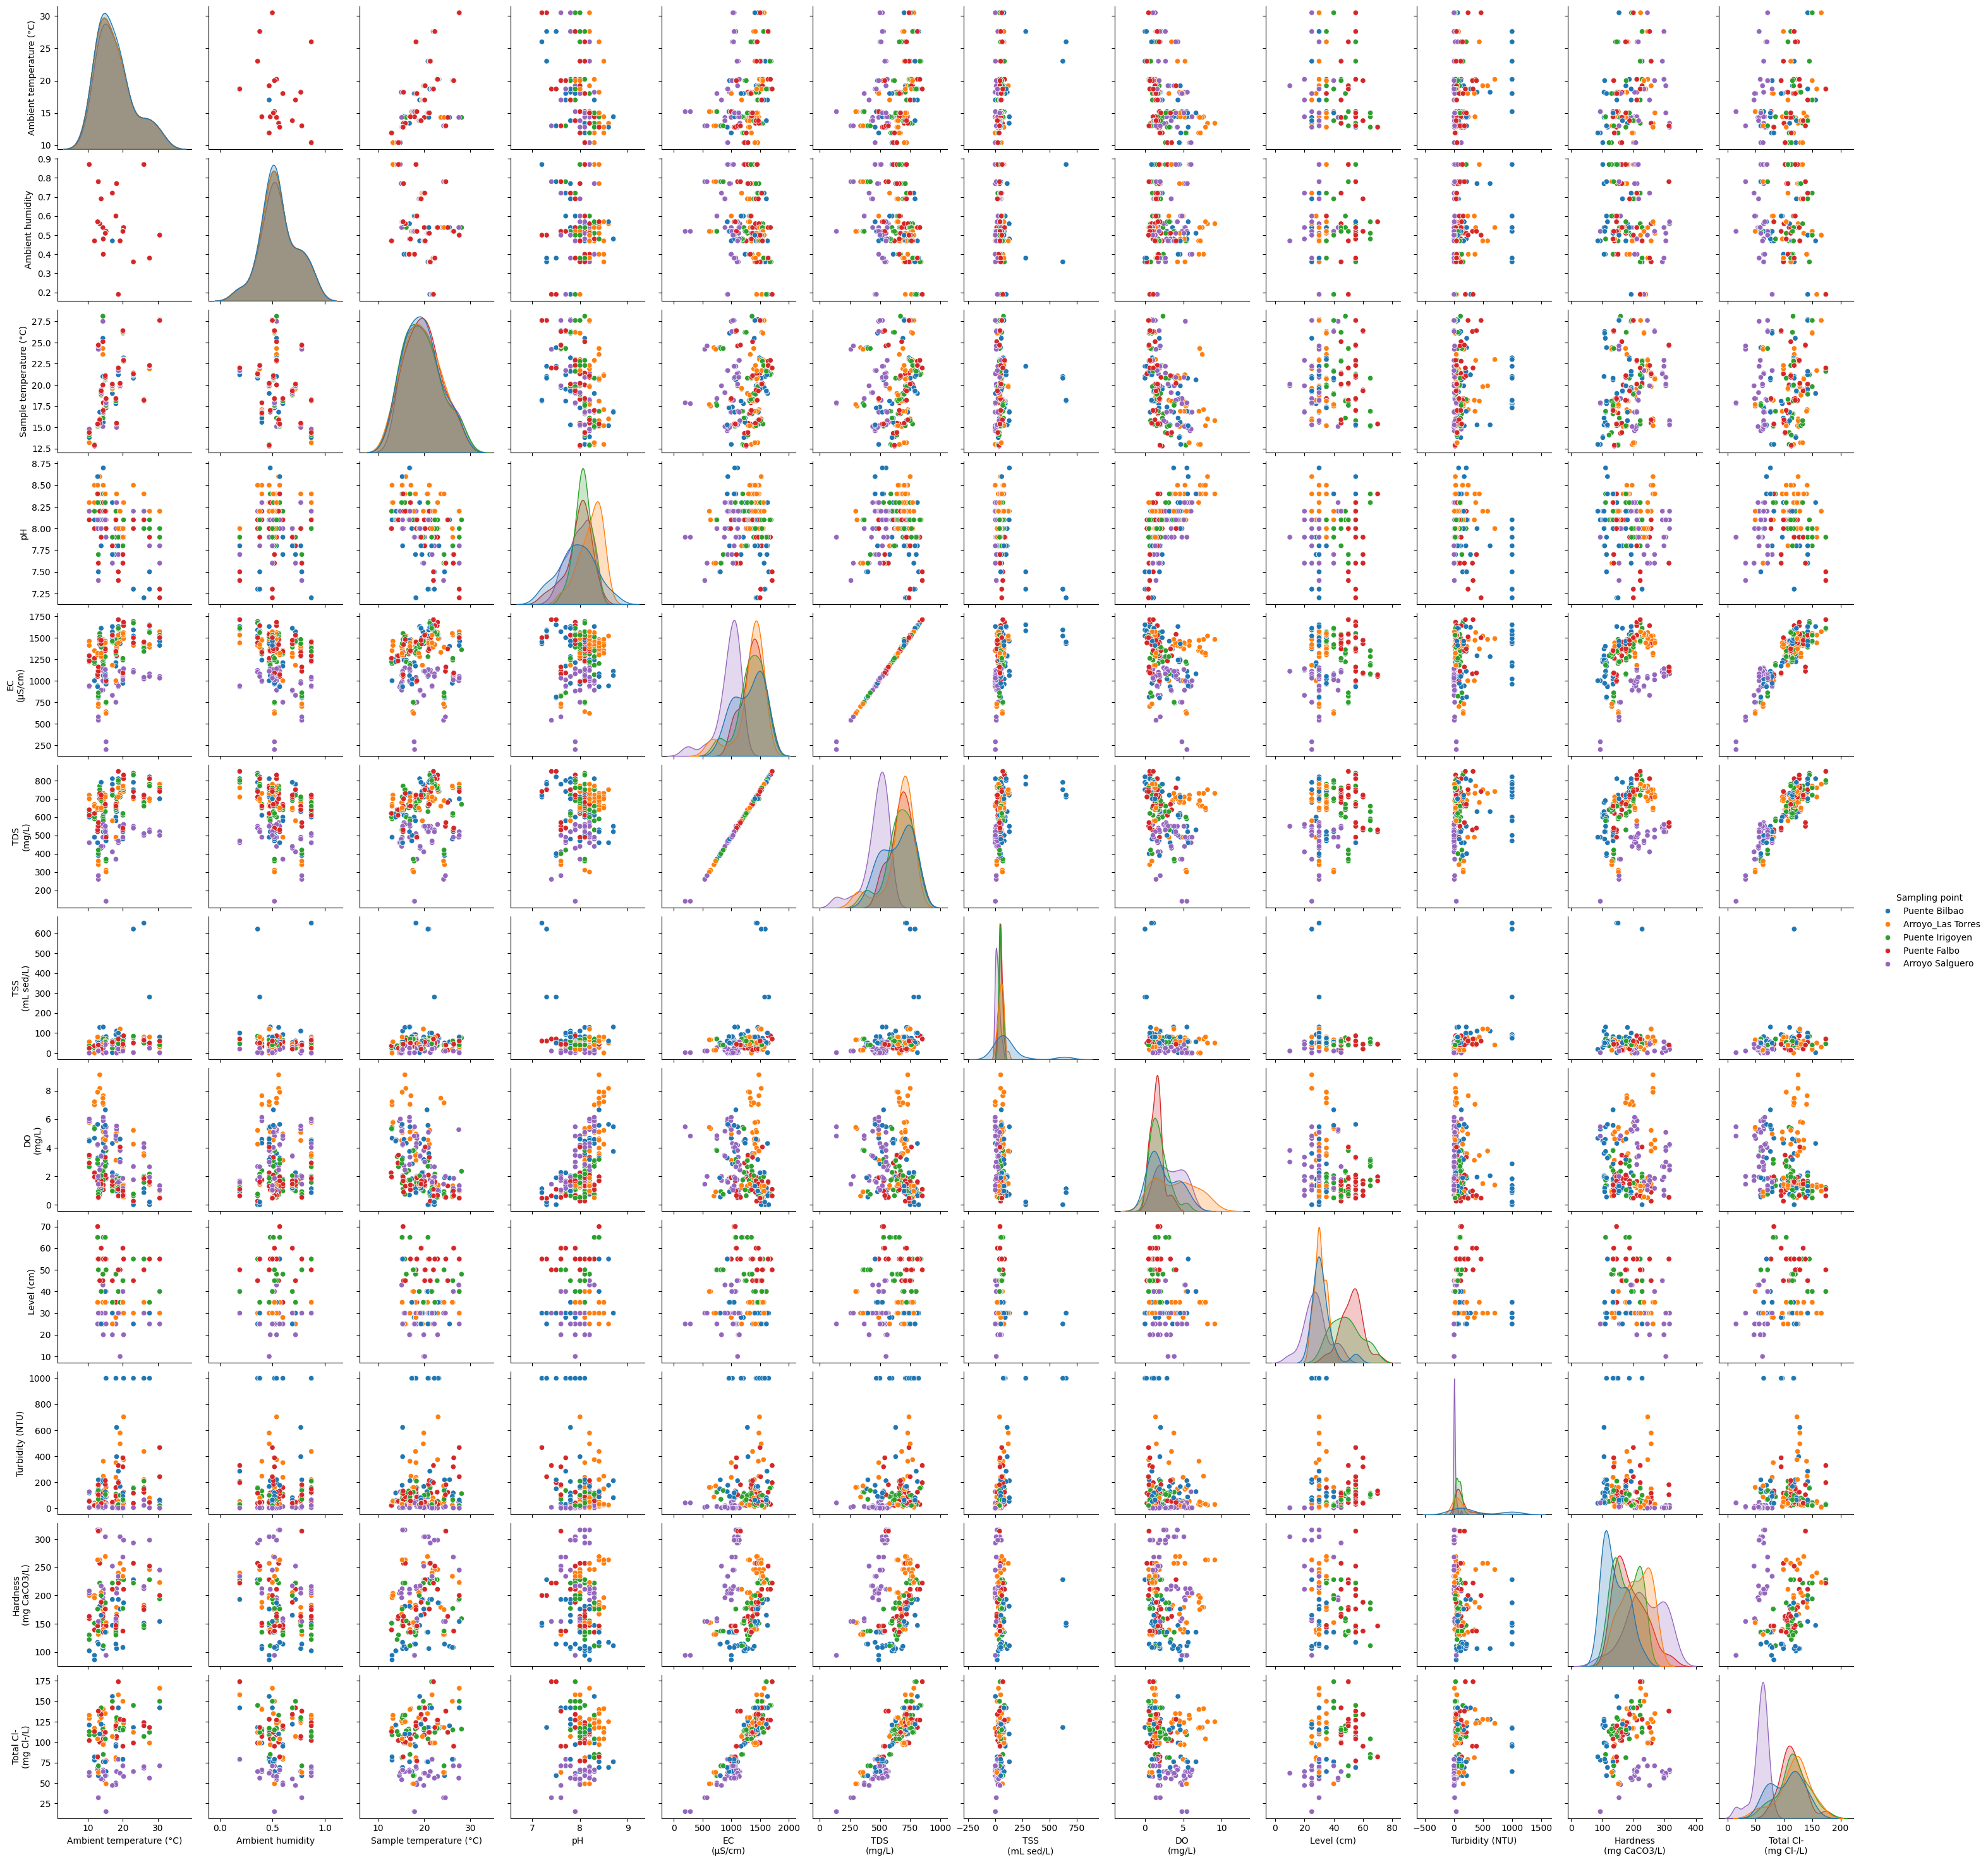

In [ ]:
sns.pairplot(gh, hue= "Sampling point")
plt.show()

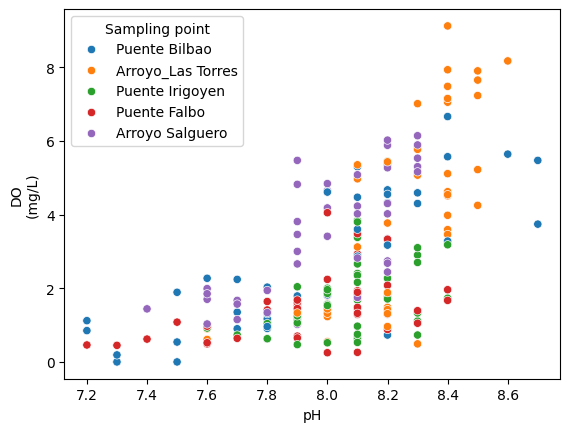

In [ ]:
sns.scatterplot(data= gh, x= 'pH', y= 'DO\n(mg/L)', hue= 'Sampling point')
plt.show()

It appears that **lower pH values give lower dissolved oxygen values**. Also, in this case, numerous red dots are observed. On the other hand, it seems that **higher pH values give higher Dissolved Oxygen values**. In this case we can see numerous orange dots.

In [ ]:
gh['Date (DD/MM/YYYY)'].value_counts()

Date (DD/MM/YYYY)
24/08/2023    10
5/09/2023     10
21/11/2023    10
3/11/2023     10
31/10/2023    10
24/10/2023    10
17/10/2023    10
10/10/2023    10
3/10/2023     10
29/09/2023    10
14/09/2023    10
28/11/2023    10
18/08/2023    10
15/08/2023    10
8/08/2023     10
2/08/2023     10
7/07/2023     10
5/07/2023     10
28/6/2023     10
26/6/2023     10
23/6/2023     10
14/06/2023     8
9/05/2023      1
Name: count, dtype: int64

Changing `Dates` to` Months`

In [ ]:
import re

pattern= re.compile('./05/.')
mask= gh.iloc[:, 0].str.contains(pattern)
gh.loc[mask, 'Date (DD/MM/YYYY)'] = 'May'

pattern= re.compile('./06/.')
mask= gh.iloc[:, 0].str.contains(pattern)
gh.loc[mask, 'Date (DD/MM/YYYY)'] = 'June'

pattern= re.compile('./6/.') # some dates lack a zero
mask= gh.iloc[:, 0].str.contains(pattern)
gh.loc[mask, 'Date (DD/MM/YYYY)'] = 'June'

pattern= re.compile('./07/.')
mask= gh.iloc[:, 0].str.contains(pattern)
gh.loc[mask, 'Date (DD/MM/YYYY)'] = 'July'

pattern= re.compile('./08/.')
mask= gh.iloc[:, 0].str.contains(pattern)
gh.loc[mask, 'Date (DD/MM/YYYY)'] = 'August'

pattern= re.compile('./09/.')
mask= gh.iloc[:, 0].str.contains(pattern)
gh.loc[mask, 'Date (DD/MM/YYYY)'] = 'September'

pattern= re.compile('./10/.')
mask= gh.iloc[:, 0].str.contains(pattern)
gh.loc[mask, 'Date (DD/MM/YYYY)'] = 'October'

pattern= re.compile('./11/.')
mask= gh.iloc[:, 0].str.contains(pattern)
gh.loc[mask, 'Date (DD/MM/YYYY)'] = 'November'

gh.rename(columns= {'Date (DD/MM/YYYY)': 'Month'}, inplace= True)

In [ ]:
gh.head()

Month Time (24 hrs XX:XX)     Sampling point  Ambient temperature (°C)  \
0   May               14:15      Puente Bilbao                      17.0   
1  June               14:30      Puente Bilbao                      11.9   
2  June               14:30      Puente Bilbao                      11.9   
3  June               15:00  Arroyo_Las Torres                      11.9   
4  June               15:00  Arroyo_Las Torres                      11.9   

   Ambient humidity  Sample temperature (°C)   pH  EC\n(µS/cm)  TDS\n(mg/L)  \
0              0.47                     19.0  8.3         1630          810   
1              0.47                     13.0  8.1         1000          490   
2              0.47                     13.0  8.2         1000          490   
3              0.47                     13.0  8.3         1350          670   
4              0.47                     13.0  8.5         1350          660   

   TSS\n(mL sed/L)  DO\n(mg/L)  Level (cm)  Turbidity (NTU)  \
0              1.8        4.30         NaN              NaN   
1             18.0        5.30         NaN             41.2   
2             18.0        4.67         NaN             38.9   
3              0.1        7.01         NaN             30.7   
4              0.1        7.23         NaN             25.6   

   Hardness\n(mg CaCO3/L) Hardness classification  Total Cl-\n(mg Cl-/L)  
0                   147.0                  BLANDA                  156.0  
1                    94.0                  BLANDA                   78.0  
2                    86.0                  BLANDA                   82.0  
3                   200.0                SEMIDURA                  117.0  
4                   196.0                SEMIDURA                  117.0

In [ ]:
gh.shape

(219, 16)

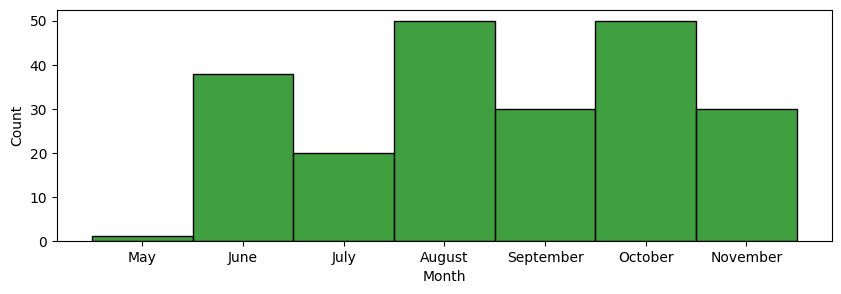

In [ ]:
plt.figure(figsize= (10,3))
sns.histplot(gh['Month'], color = 'green')
plt.show()

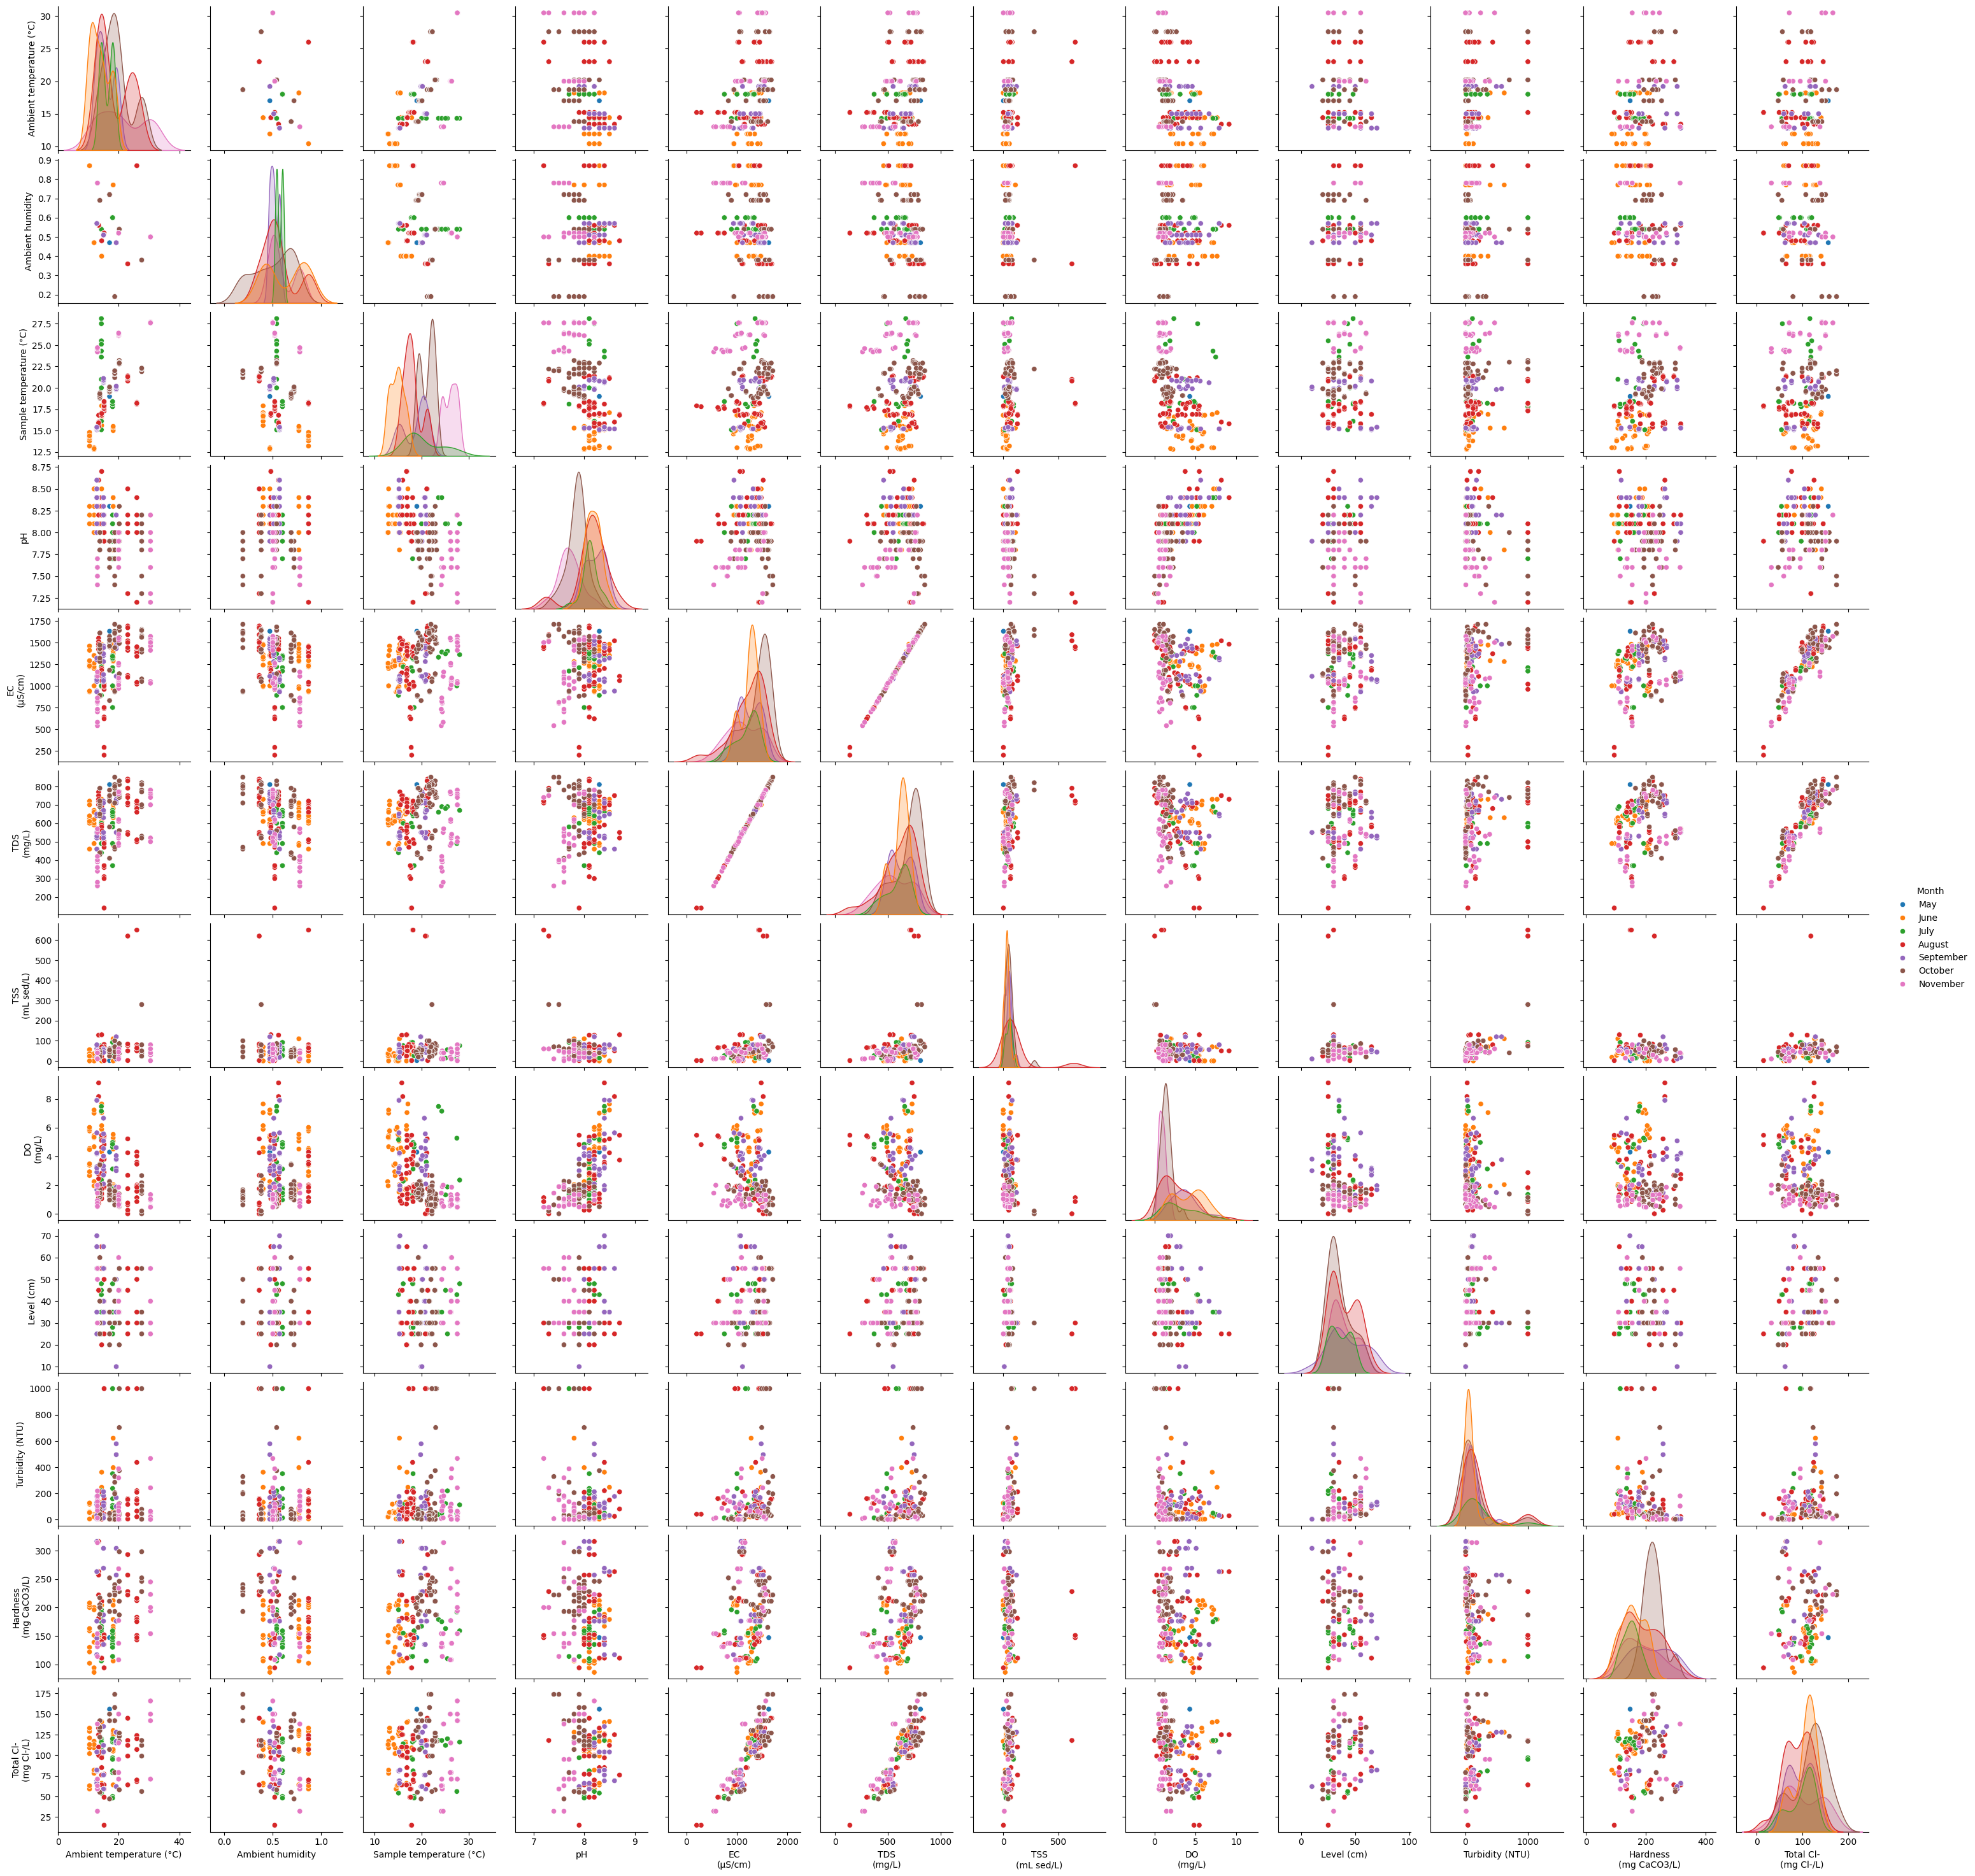

In [ ]:
sns.pairplot(gh, hue= 'Month')
plt.show()

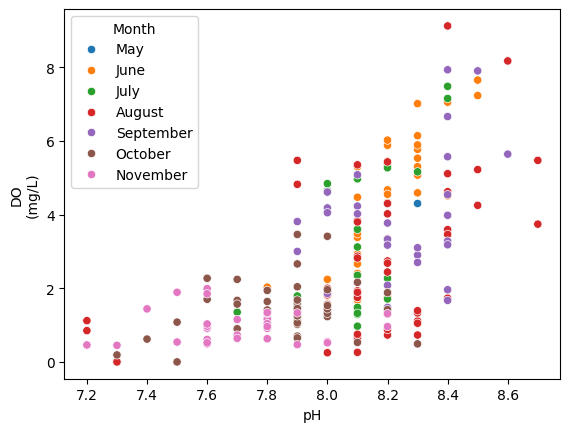

In [ ]:
sns.scatterplot(data= gh, x= 'pH', y= "DO\n(mg/L)", hue= 'Month')
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


## Data Separation(feature Engineering)

In [ ]:
#Please use code cells to code in and do not forget to comment your code.
X, y = df[df.columns.difference(["DO"])], df["DO"]

train_size = 0.8
train_index = int(train_size*len(X))

X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

## **Feature Selection**

In [ ]:
selector = SelectKBest(score_func = f_regression, k = 5)
X_train_optim = pd.DataFrame(selector.fit_transform(X_train, y_train), index=X_train.index)
X_test_optim = pd.DataFrame(selector.transform(X_test), index=X_test.index)
selector.get_support()*X_train.columns

Index(['', 'Ambient_temperature', '', '', '', '', '', 'TDS', '', '', '', '',
       '', '', 'month', 'ph', '', 'pt_Arroyo_Las Torres', '', '', ''],
      dtype='object')

In [ ]:
NAMES = ["Ambient_temperature","TDS","month","ph","pt_Arroyo_Las Torres"]

X_train_optim.columns = NAMES
X_test_optim.columns = NAMES
X_train_optim

Ambient_temperature    TDS  month   ph  \
Datetime                                                      
2023-05-09 14:15:00                 17.0  810.0    5.0  8.3   
2023-06-14 14:30:00                 11.9  490.0    6.0  8.1   
2023-06-14 14:30:00                 11.9  490.0    6.0  8.2   
2023-06-14 15:00:00                 11.9  670.0    6.0  8.3   
2023-06-14 15:00:00                 11.9  660.0    6.0  8.5   
...                                  ...    ...    ...  ...   
2023-10-24 15:15:00                 17.0  740.0   10.0  7.7   
2023-10-24 15:35:00                 17.0  580.0   10.0  7.8   
2023-10-24 15:35:00                 17.0  580.0   10.0  7.8   
2023-10-24 15:40:00                 17.0  720.0   10.0  7.9   
2023-10-24 15:40:00                 17.0  720.0   10.0  7.8   

                     pt_Arroyo_Las Torres  
Datetime                                   
2023-05-09 14:15:00                   0.0  
2023-06-14 14:30:00                   0.0  
2023-06-14 14:30:00                   0.0  
2023-06-14 15:00:00                   1.0  
2023-06-14 15:00:00                   1.0  
...                                   ...  
2023-10-24 15:15:00                   0.0  
2023-10-24 15:35:00                   1.0  
2023-10-24 15:35:00                   1.0  
2023-10-24 15:40:00                   0.0  
2023-10-24 15:40:00                   0.0  

[175 rows x 5 columns]

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

###**XGBoost**

In [ ]:
#Please use code cells to code in and do not forget to comment your code.
#XGBoost performance review
rmse = make_scorer(lambda x,y : np.sqrt(mean_squared_error(x,y)))
mae = make_scorer(mean_absolute_error)

In [ ]:
xgbr = XGBRegressor()
tscv = TimeSeriesSplit(n_splits=5)

rmse_scores = cross_val_score(estimator=xgbr, X=X_train, y=y_train, scoring=rmse, cv=tscv)
mae_scores = cross_val_score(estimator=xgbr, X=X_train, y=y_train, scoring=mae, cv=tscv)

print(f"train RMSE scores : {rmse_scores}")
print(f"train mean RMSE : {rmse_scores.mean():.3f}")

print(f"train MAE scores : {mae_scores}")
print(f"train mean MAE : {mae_scores.mean():.3f}")

train RMSE scores : [1.62660219 3.617466   1.29426252 1.91892547 1.09041151]
train mean RMSE : 1.910
train MAE scores : [1.2117341  3.22174849 1.00153234 1.53078649 0.86311944]
train mean MAE : 1.566


In [ ]:
xgbr = XGBRegressor()
tscv = TimeSeriesSplit(n_splits=5)

rmse_scores = cross_val_score(estimator=xgbr, X=X_train_optim, y=y_train, scoring=rmse, cv=tscv)
mae_scores = cross_val_score(estimator=xgbr, X=X_train_optim, y=y_train, scoring=mae, cv=tscv)

print(f"train RMSE scores : {rmse_scores}")
print(f"train mean RMSE : {rmse_scores.mean():.3f}")

print(f"train MAE scores : {mae_scores}")
print(f"train mean MAE : {mae_scores.mean():.3f}")

train RMSE scores : [1.71620477 1.95385164 1.86103431 2.12208362 1.32445099]
train mean RMSE : 1.796
train MAE scores : [1.2450758  1.39328542 1.56671211 1.71347867 0.98960471]
train mean MAE : 1.382


**XGBoost validation**

In [ ]:
xgbr.fit(X_train_optim, y_train)
y_pred = xgbr.predict(X_test_optim)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = mean_absolute_error(y_pred, y_test)

print(f"RMSE validation score : {rmse:.3f}")
print(f"MAE validation score : {mae:.3f}")

RMSE validation score : 1.611
MAE validation score : 1.187


###**K-means Clustering**

In [ ]:
bd_clustering= gh[['DO\n(mg/L)', 'pH']]
bd_clustering.head()

DO\n(mg/L)   pH
0        4.30  8.3
1        5.30  8.1
2        4.67  8.2
3        7.01  8.3
4        7.23  8.5

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

bd_clustering_scaled_array= scaler.fit_transform(bd_clustering)
bd_clustering_scaled= pd.DataFrame(bd_clustering_scaled_array, columns= bd_clustering.columns)

bd_clustering_scaled.head()

DO\n(mg/L)        pH
0    0.859872  0.927990
1    1.371896  0.236732
2    1.049321  0.582361
3    2.247456  0.927990
4    2.360101  1.619248

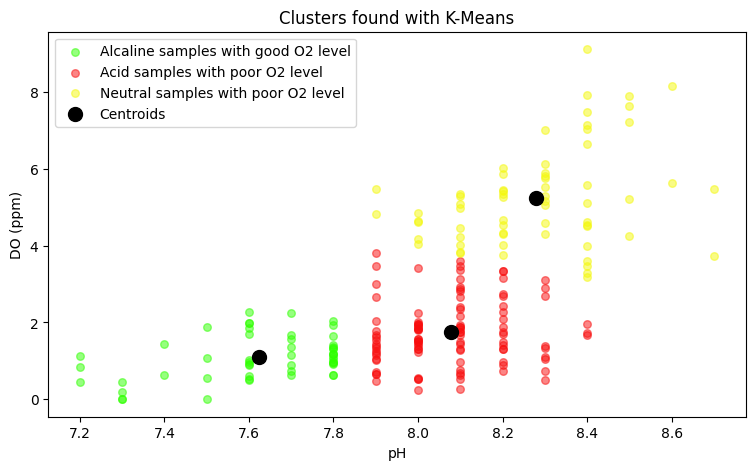

In [ ]:
!pip install -q kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'bd_clustering' is your DataFrame
# Perform K-Means clustering
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(bd_clustering_scaled)
    sse.append(kmeans.inertia_)

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kmeans = KMeans(n_clusters=kl.elbow, **kmeans_kwargs)
kmeans.fit(bd_clustering_scaled)
clusters = kmeans.predict(bd_clustering_scaled) # Assign cluster labels to data points

centers = kmeans.cluster_centers_ # Get cluster centers

plt.figure(figsize=(9,5))

plt.scatter(bd_clustering.iloc[clusters == 1, 1], bd_clustering.iloc[clusters == 1, 0], s = 30, c = "#2eff00", alpha= 0.5, label = "Alcaline samples with good O2 level")
plt.scatter(bd_clustering.iloc[clusters == 0, 1], bd_clustering.iloc[clusters == 0, 0], s = 30, c = "#f80d0d", alpha= 0.5, label = "Acid samples with poor O2 level")
plt.scatter(bd_clustering.iloc[clusters == 2, 1], bd_clustering.iloc[clusters == 2, 0], s = 30, c = "#f4f80d", alpha= 0.5, label = "Neutral samples with poor O2 level")

re_scaled_centroids= scaler.inverse_transform(centers)
plt.scatter(re_scaled_centroids[:, 1], re_scaled_centroids[:, 0], c= 'black', s= 100, label='Centroids')

plt.title('Clusters found with K-Means')
plt.xlabel('pH')
plt.ylabel('DO (ppm)')
plt.legend()
plt.show()

##### Observations from the K-means model

We have found three groups of waters samples, which can be explained by chemical cryteria:

>1. **Alcaline samples with good O2 level:** it is known that aquatic life need at least ~ 4 ppm of DO in water in order to live. Therefore, we could say these water samples are not so bad.  
>2. **Acid samples with poor O2 level:** normally, healthy river waters present higher pH values. These are the worst water samples.
>3. **Neutral samples with poor O2 level:** they are in the middle.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix:
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors:
If this is a group project, list the contributors and their roles or contributions to the project.
